In [181]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# 初始化模拟参数
params = {
    "rB": 0.4,
    "aBA": 0.007,
    "aAB":0.003,
    "dA":0.02,

    "k":0.005,
    "B0":40,

    "prey_population":50,
    "lamprey_male_population":10,
    "lamprey_female_population":10,
}

In [183]:
# 创建时间
sim_time = 500
dt = 0.1
time = np.arange(0, sim_time, dt)

# 初始化数组来存储猎物和猎食者的数量随时间的变化
prey_population_list = []
lamprey_male_list = []
lamprey_female_list = []

In [184]:
# 是一个与食物数量（prey的数量）有关的函数，用于描述随着食物减少，雌性向雄性转换的速率
def thetaGet(B, params):
    _exp = np.exp(-params["k"] * (B - params["B0"]))
    _frac = 1 / (1 + _exp) - 0.5
    return 0
    return (
        _frac
        * params["aAB"]
        * (params["lamprey_male_population"] + params["lamprey_female_population"])
    )

In [185]:
# 模拟饱和Lotka-Volterra模型
for t in time:
    prey_growth = params["rB"] * params["prey_population"] - params["aBA"] * params[
        "prey_population"
    ] * (params["lamprey_male_population"] + params["lamprey_female_population"])
    print("prey_growth: ", prey_growth)
    lamprey_male_growth = (
        params["aAB"] * params["prey_population"] * params["lamprey_male_population"]
        - params["dA"] * params["lamprey_male_population"]
        - thetaGet(params["prey_population"], params)
    )
    
    lamprey_female_growth = (
        params["aAB"] * params["prey_population"] * params["lamprey_female_population"]
        - params["dA"] * params["lamprey_female_population"]
        + thetaGet(params["prey_population"], params)
    )

    params["prey_population"] += prey_growth * dt
    params["lamprey_male_population"] += lamprey_male_growth * dt
    params["lamprey_female_population"] += lamprey_female_growth * dt

    

    print("------------------sim_time:", t, "-------------------")
    print(
        "prey_growth: ",
        prey_growth,
        "\n lamprey_male_growth: ",
        lamprey_male_growth,
        "\n lamprey_female_growth: ",
        lamprey_female_growth,
    )
    print("---------------------------------------------------", "\n")

    prey_population_list.append(params["prey_population"])
    lamprey_male_list.append(params["lamprey_male_population"])
    lamprey_female_list.append(params["lamprey_female_population"])

prey_growth:  13.0
------------------sim_time: 0.0 -------------------
prey_growth:  13.0 
 lamprey_male_growth:  1.3 
 lamprey_female_growth:  1.3
--------------------------------------------------- 

prey_growth:  13.244634
------------------sim_time: 0.1 -------------------
prey_growth:  13.244634 
 lamprey_male_growth:  1.356407 
 lamprey_female_growth:  1.356407
--------------------------------------------------- 

prey_growth:  13.486651693874197
------------------sim_time: 0.2 -------------------
prey_growth:  13.486651693874197 
 lamprey_male_growth:  1.4153586858841012 
 lamprey_female_growth:  1.4153586858841012
--------------------------------------------------- 

prey_growth:  13.725341122024629
------------------sim_time: 0.30000000000000004 -------------------
prey_growth:  13.725341122024629 
 lamprey_male_growth:  1.476980105570447 
 lamprey_female_growth:  1.476980105570447
--------------------------------------------------- 

prey_growth:  13.95993367918174
----------

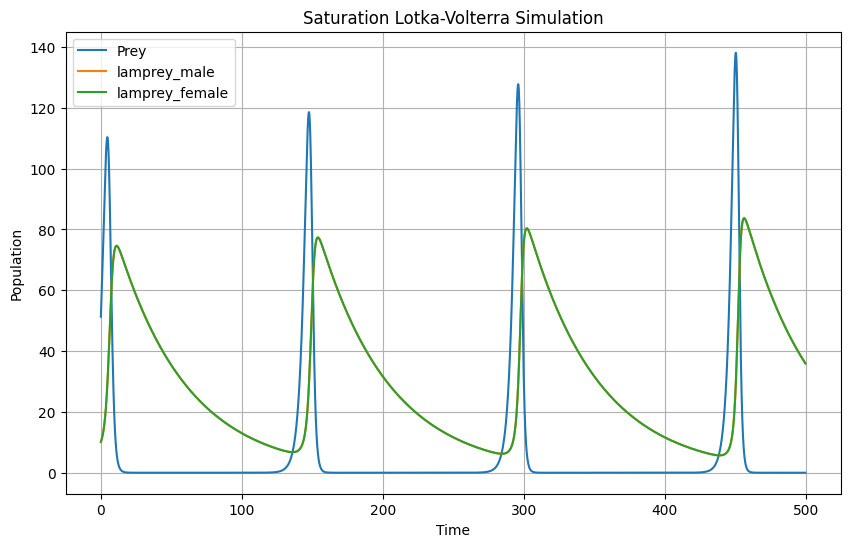

In [186]:
# 绘制猎物和猎食者数量随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(time, prey_population_list, label="Prey")
plt.plot(time, lamprey_male_list, label="lamprey_male")
plt.plot(time, lamprey_female_list, label="lamprey_female")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Saturation Lotka-Volterra Simulation")
plt.grid(True)
plt.show()